In [4]:
#Import all necessary libraries
import os
import sys
import json
import numpy as np
import imgaug.augmenters as iaa
import skimage.draw
import cv2
import tensorflow as tf
import keras
from PIL import Image, ImageDraw
from mrcnn.config import Config
from mrcnn import model as modellib, utils
from mrcnn.visualize import display_instances
from mrcnn import visualize
import matplotlib.pyplot as plt
from os import listdir
import random
from mrcnn.model import log
from mrcnn import utils

TypeError: 'numpy._DTypeMeta' object is not subscriptable

In [5]:
class Configuration(Config):
    # Give the configuration a recognizable name
    NAME = "Janika Balaz"

    # We use a GPU with 12GB memory, which can fit two images.
    # Adjust down if you use a smaller GPU.
    IMAGES_PER_GPU = 1

    # Number of classes (including background)
    NUM_CLASSES = 1 + 1  # Background + Janika balaz monument

    # Number of training steps per epoch
    STEPS_PER_EPOCH = 150
    LEARNING_RATE = 0.001
        
    RPN_ANCHOR_SCALES = (8, 16, 32, 64, 128)
    TRAIN_ROIS_PER_IMAGE = 32
    MAX_GT_INSTANCES = 50 
    POST_NMS_ROIS_INFERENCE = 500 
    POST_NMS_ROIS_TRAINING = 1000 

    # Skip detections with < 90% confidence
    DETECTION_MIN_CONFIDENCE = 0.9

NameError: name 'Config' is not defined

In [6]:
class CustomDataset(utils.Dataset):

    def load_data(self, annotation_json, images_dir,isTrain,*n):
        """ Load the coco-like dataset from json
        Args:
            annotation_json: The path to the coco annotations json file
            images_dir: The directory holding the images referred to by the json file
        """
        json_file = open(annotation_json)
        coco_json = json.load(json_file)
        json_file.close()
        if len(n) != 0:
            numberOfRealTrainPhotos=int(n[0])
        
        if(isTrain):
            source_name = "Train dataset"
        else:
            source_name="Validation dataset"
        for category in coco_json['categories']:
            class_id = category['id']+1
            class_name = category['name']
            if class_id < 1:
                print('Error: Class id for "{}" cannot be less than one. (0 is reserved for the background)'.format(class_name))
                return
            print(class_name)
            self.add_class(source_name, class_id, class_name)
        
        annotations = {}
        for annotation in coco_json['annotations']:
            image_id = annotation['image_id']
            if image_id not in annotations:
                annotations[image_id] = []
            annotations[image_id].append(annotation)
        
        seen_images = {}
        for image in coco_json['images']:
            image_id = image['id']
            if image_id in seen_images:
                print("Warning: Skipping duplicate image id: {}".format(image))
            else:
                seen_images[image_id] = image
                try:
                    image_file_name = image['file_name']
                    image_width = image['width']
                    image_height = image['height']
                except KeyError as key:
                    print("Warning: Skipping image (id: {}) with missing key: {}".format(image_id, key))
                
                image_path = os.path.abspath(os.path.join(images_dir, image_file_name))
                if(isTrain and image_id<=numberOfRealTrainPhotos):
                    image_annotations = annotations[image_id]
                
                if(not isTrain):
                    image_annotations = annotations[image_id]
                
                self.add_image(
                    source=source_name,
                    image_id=image_id,
                    path=image_path,
                    width=image_width,
                    height=image_height,
                    annotations=image_annotations)

    def load_mask(self, image_id):
        """ Load instance masks for the given image.
        MaskRCNN expects masks in the form of a bitmap [height, width, instances].
        Args:
            image_id: The id of the image to load masks for
        Returns:
            masks: A bool array of shape [height, width, instance count] with
                one mask per instance.
            class_ids: a 1D array of class IDs of the instance masks.
        """
        image_info = self.image_info[image_id]
        annotations = image_info['annotations']
        instance_masks = []
        class_ids = []
    
        for annotation in annotations:
            class_id = annotation['category_id']
            mask = Image.new('1', (image_info['width'], image_info['height']))
            mask_draw = ImageDraw.ImageDraw(mask, '1')
            for segmentation in annotation['segmentation']:
                mask_draw.polygon(segmentation, fill=1)
                bool_array = np.array(mask) > 0
                instance_masks.append(bool_array)
                class_ids.append(class_id)

        mask = np.dstack(instance_masks)
        class_ids = np.array(class_ids, dtype=np.int32)
        
        return mask, class_ids

    def image_reference(self, image_id):
        """Return the path of the image."""
        info = self.image_info[image_id]
        if info["source"] == "object":
            return info["path"]
        else:
            super(self.__class__, self).image_reference(image_id)

NameError: name 'utils' is not defined

In [3]:
LOGS_DIR = os.path.abspath("C:/Users/Kaja/Desktop/KatarinaZoricIT10_2019/logs")
dataset_val = CustomDataset()
dataset_val.load_data("C:/Users/Kaja/Desktop/KatarinaZoricIT10_2019/Slike/val/validation_annotations.json", "C:Users/Kaja/Desktop/KatarinaZoricIT10_2019/Slike/val/",False)
dataset_val.prepare()
config = Configuration()
model = modellib.MaskRCNN(mode="inference", model_dir=LOGS_DIR,
                              config=config)

NameError: name 'os' is not defined

In [2]:
weights_path = "C:/Users/Kaja/Desktop/KatarinaZoricIT10_2019/logs/logs/janika_balaz20230209T0040/mask_rcnn_janika_balaz_0012.h5"
model.load_weights(weights_path, by_name=True)

NameError: name 'model' is not defined

In [6]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

image ID: Validation dataset.6 (5) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  139.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -0.08847  max:    1.02591  float32
gt_class_id              shape: (1,)                  min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (1, 4)                min:  101.00000  max:  845.00000  int32
gt_mask                  shape: (1024, 1024, 1)       min:    0.00000  max:    1.00000  bool


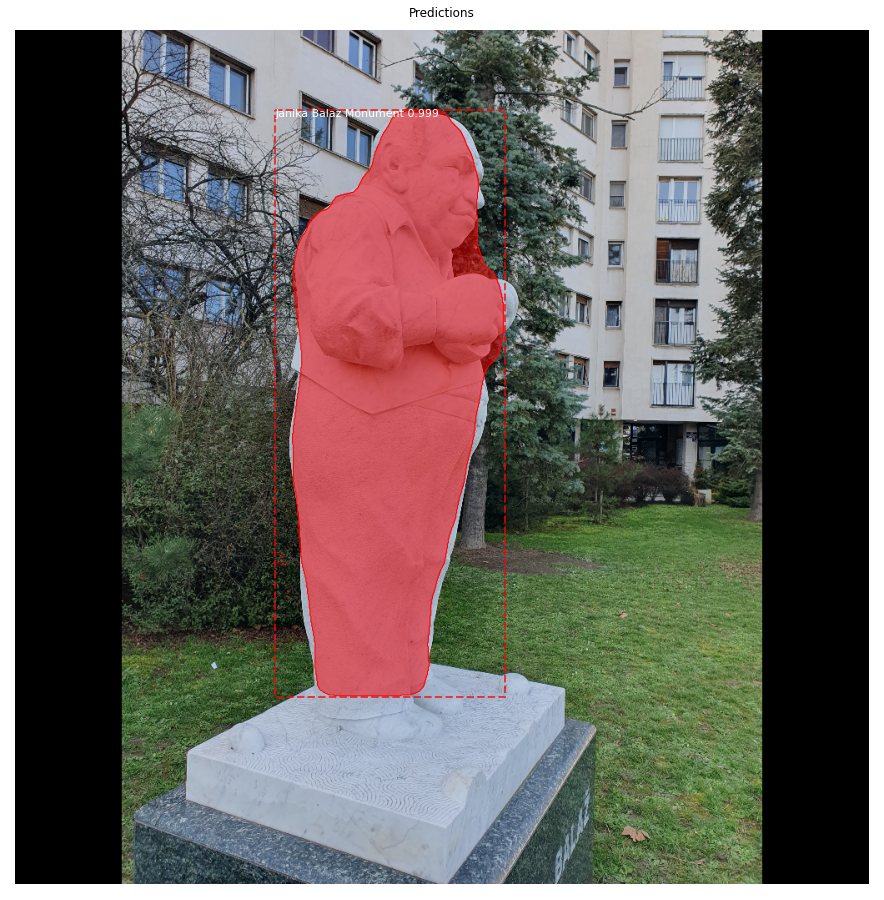

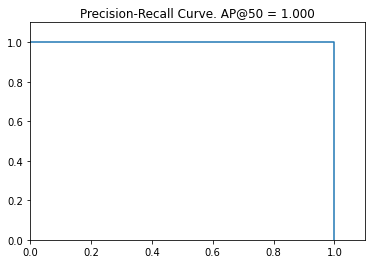

In [7]:
image_id = random.choice(dataset_val.image_ids)
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset_val, config, image_id, use_mini_mask=False)
info = dataset_val.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       dataset_val.image_reference(image_id)))

# Run object detection
results = model.detect([image], verbose=1)

# Display results
ax = get_ax(1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset_val.class_names, r['scores'], ax=ax,
                            title="Predictions")
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)
AP, precisions, recalls, overlaps = utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                                          r['rois'], r['class_ids'], r['scores'], r['masks'])
visualize.plot_precision_recall(AP, precisions, recalls)

In [8]:
from mrcnn.utils import compute_ap, compute_recall
from mrcnn.model import load_image_gt
from mrcnn.model import mold_image
from numpy import zeros
from numpy import asarray
from numpy import expand_dims
from numpy import mean
def evaluate_model(dataset, model, cfg):
    APs = list(); ARs = list(); 
    for image_id in dataset.image_ids:
        image, image_meta, gt_class_id, gt_bbox, gt_mask = load_image_gt(dataset, cfg, image_id, use_mini_mask=False)
        scaled_image = mold_image(image, cfg)
        sample = expand_dims(scaled_image, 0)
        yhat = model.detect(sample, verbose=0)
        r = yhat[0]
        AP, _, _, _ = compute_ap(gt_bbox, gt_class_id, gt_mask, r["rois"], r["class_ids"], r["scores"], r['masks'])
        AR, _ = compute_recall(r["rois"], gt_bbox, iou=0.75) 
        ARs.append(AR)
        APs.append(AP)
        
    mAP = mean(APs)
    mAR = mean(ARs) 
    return mAP, mAR


AP, AR = evaluate_model(dataset_val, model, config)

f1_score = (2 * AP * AR)/(AP + AR)

print('f1-score:', f1_score)
print('precision:',AP)
print('recall:',AR)

f1-score: 0.896551724137931
precision: 1.0
recall: 0.8125
